This notebook builds a single neuron NN, and compares it's prediction with a manual calculation for linear regression and 1-dim classification task
* linear regression vs single neuron
* logistic regression vs single neuron
* no forward propagaion - weights set manually

In [97]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Regression

The function implemented by a neuron with no activation is the same as in Course 1, linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$

Load predefined data

In [98]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

Tensorflow Single Neuron NN

In [99]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1, activation="linear", name="L1"),
])

linear_layer = model.layers[0]

Set weights

In [100]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

Predictions and comparison againts manual calculation:


Text(0, 0.5, 'Tensorflow')

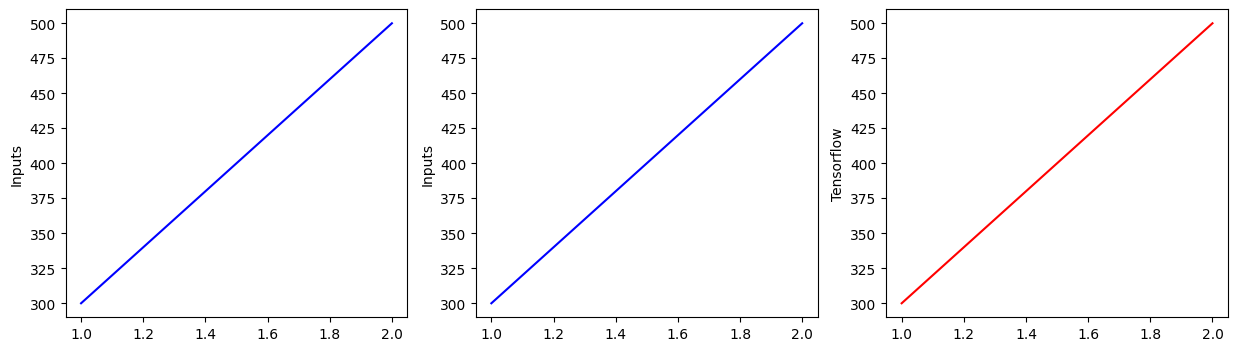

In [101]:
tf_prediction = linear_layer(X_train)
manual_prediction = np.dot(X_train, set_w) + set_b

fig, ax = plt.subplots(1, 3, figsize=(15,4))
ax[0].plot(X_train, Y_train, c='b')
ax[0].set_ylabel("Inputs")
ax[1].plot(X_train, manual_prediction, c='b')
ax[1].set_ylabel("Inputs")
ax[2].plot(X_train, tf_prediction, c='r')
ax[2].set_ylabel("Tensorflow")

# Classification

The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Predefined inputs

In [102]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

Tensorflow Single Neuron NN

In [103]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1, activation="sigmoid", name="L1")
])

sigmoid_layer = model.get_layer("L1")

Set weights

In [104]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
sigmoid_layer.set_weights([set_w,set_b])
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

Predict

In [105]:
f = lambda x: np.dot(x,set_w)+set_b
g = lambda x: 1 / (1 + np.exp(-f(X_train)))

tf_prediction = sigmoid_layer(X_train)
manual_prediction = g(X_train)

Comparison

Text(0, 0.5, 'Tensorflow')

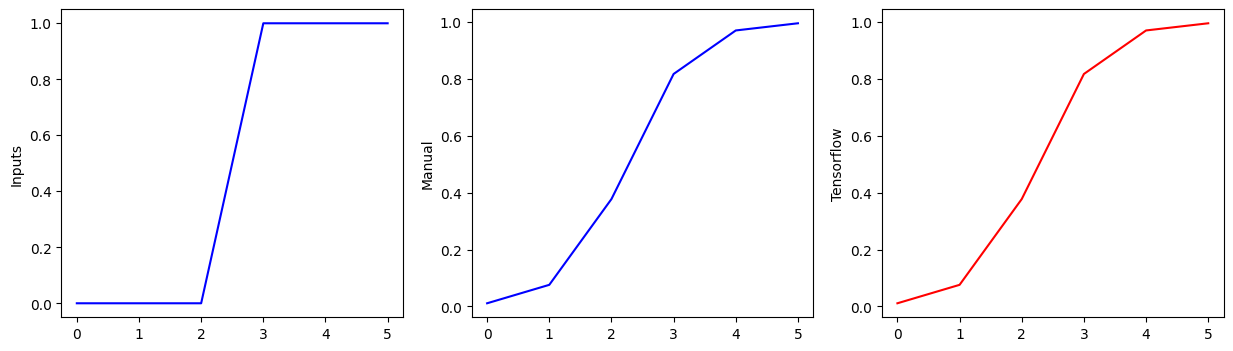

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
ax[0].plot(X_train, Y_train, c='b')
ax[0].set_ylabel("Inputs")
ax[1].plot(X_train, manual_prediction, c='b')
ax[1].set_ylabel("Manual")
ax[2].plot(X_train, tf_prediction, c='r')
ax[2].set_ylabel("Tensorflow")